In [1]:
# Load libraries and convenience functions

from IPython import display
import matplotlib.pyplot as plt
import numpy as np

def load_image(filename):
    img = np.load(filename)
    img = img.astype("float32") / 255.
    return img

def gray2rgb(image):
    return np.repeat(np.expand_dims(image, 2), 3, axis=2)

def show_image(img):
    plt.imshow(img, interpolation='nearest')

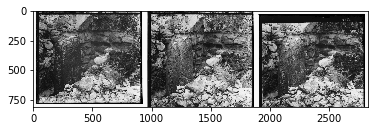

In [2]:
images = [load_image('red.npy'),
          load_image('green.npy'),
          load_image('blue.npy')]

show_image(gray2rgb(np.concatenate(images, axis=1)))

# The Problem
-----------
Because these images were taken separately, just combining them in a 3-channel matrix may not work. The code below shows what happens if you simply combine the images without shifting any of the channels. Run the code to visualize what happens if you just combine them without correctly aligning them.

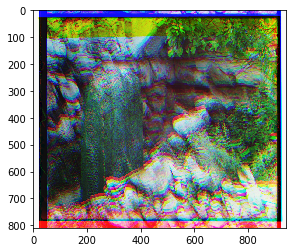

In [3]:
show_image(np.stack(images, axis=-1))

Your Task
---------

Your job is to write a function that takes these three images, and correctly aligns them. Since you have to process many of these images, you do not want to manually align them. Instead, your task is to write a program that automatically finds the alignment, then combines them together to produce the final image.

The easiest way to do this is to find the alignment between two pairs of channels at a time. For example, you can figure out how to align the red channel with the green channel, and the red channel with the blue channel. Then, you can combine them together.

We have given you code to get you started. You should fill in three areas:

1. **score_function(im1, im2)** should take in two images, and return a floating point score to indicate how well the two images are aligned. The lower the score, the better they are aligned. There are many scoring functions you can experiment with. The simplest is Euclidean distance betwen the two images.

2. **align_channels(chan1, chan2)** should take in two images, and return a tuple (dy, dx) indicating how to shift one image into the other. This funnction should call **score_function()** to perform this task. For simplicity, you can assume that the shift is at most -30 pixels to 30 pixels. 

3. **combine_images()** should use the found alignments to correctly combine the images into a color image.

Submission
----------

You should export your completed notebook as a PDF and upload to Courseworks. The completed notebook should show your code, as well as the final combined image you created. 

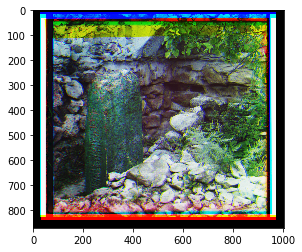

In [4]:
# Store the height and width of the images
height, width = images[0].shape
import math
# Pad each image with black by 30 pixels. You do not need to use this, but
# padding may make your implementation easier.
pad_size = 30
images_pad = np.array([np.pad(x, pad_size, mode='constant') for x in images])

# Given two matrices, write a function that returns a number of how well they are aligned.
# The lower the number, the better they are aligned. There are a variety of scoring functions
# you can use. The simplest one is the Euclidean distance between the two matrices. 
def score_function(im1,im2):
    height, width = np.array(im1).shape
    #print(height, width)
    score = 0
    for i in range(400,height-400):
        for j in range(400,width-400):
            score = math.sqrt(pow((im1[i,j]-im2[i,j]),2))+score
    score = score/(height*width)
    return score

# Given two matrices chan1 and chan2, return a tuple of how to shift chan2 into chan1. This
# function should search over many different shifts, and find the best shift that minimizes
# the scoring function defined above. 
def align_channels(chan1,chan2):
    
    
    #First, check the up & down shift
    # move image up for 30 pixel
    temp = np.roll(chan2,-30,0)
    # moving down for test
    best_score = 1
    for i in range(0,60):
        shifted_image = np.roll(temp,i,0)
        score = score_function(chan1,shifted_image);
        if score <= best_score:
            best_score = score
            best_offset1 = i
            best_image = shifted_image
        if best_score < score:
            break
    
    
    #Then, check the left & right shift
    #transpose array
    # Here, I used the best shifted image obtained from the up & down shift part
    temp = np.transpose(best_image)
    # move image left for 30 pixel
    temp = np.roll(temp,-30,0)
    # moving right for test
    best_score = 1
    for i in range(0,60):
        shifted_image = np.roll(temp,i,0)
        shifted_image = np.transpose(shifted_image)
        score = score_function(chan1,shifted_image);
        #store the best socre
        if score <= best_score:
            best_score = score
            best_offset2 = i
            best_image = shifted_image
        # if the score is getting worse, quit the loop
        if best_score < score:
            break
    # combine the best x, y offset
    best_offset=(best_offset1-30,best_offset2-30)
    
    return best_offset

# Use the best alignments to now combine the three images. You should use any of the variables
# above to return a tensor that is (Height)x(Width)x3, which is a color image that you can visualize.

def combine_images():
    #get the shift coordinate
    rg_dy, rg_dx = align_channels(images_pad[0], images_pad[1])
    rb_dy, rb_dx = align_channels(images_pad[0], images_pad[2])
    
    #shift up & down 
    shifted_image0 =  np.roll(images_pad[1],rg_dy,0)
    shifted_image1 =  np.roll(images_pad[2],rb_dy,0)
    
    #shift left & right 
    shifted_image0 =  np.transpose(np.roll(np.transpose(shifted_image0),rg_dx,0))
    shifted_image1 =  np.transpose(np.roll(np.transpose(shifted_image1),rg_dx,0))
    
    #combine images
    images = [images_pad[0],
             shifted_image0,
             shifted_image1]
    images = np.stack(images, axis=-1)
    
    return images

final_image = combine_images()
if final_image is not None:
    show_image(final_image)

Acknowledgements
----------------

This homework is based on assignments from Subhransu Maji at University of Massachusetts, Amherst, Alyosha Efros at University of California, Berkeley, Jia Deng at University of Michigan, and Deva Ramanan at Carnegie Mellon University. 